In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score


In [18]:
#Load data

train = pd.read_csv("train_data.txt", sep=":::", names=["ID", "TITLE", "GENRE", "DESCRIPTION"], engine='python')
test = pd.read_csv("test_data.txt", sep=":::", names=["ID", "TITLE", "DESCRIPTION"], engine='python')
test_solution = pd.read_csv("test_data_solution.txt", sep=":::", names=["ID", "TITLE", "GENRE", "DESCRIPTION"], engine='python')


In [19]:
#get informations about trainning dataset

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [20]:
print("Trainning dataset:")
train.head()

Trainning dataset:


,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [21]:
print("Test dataset:")
test.head()

Test dataset:


,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [22]:
#check null values in the dataset
train.isnull().sum()

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

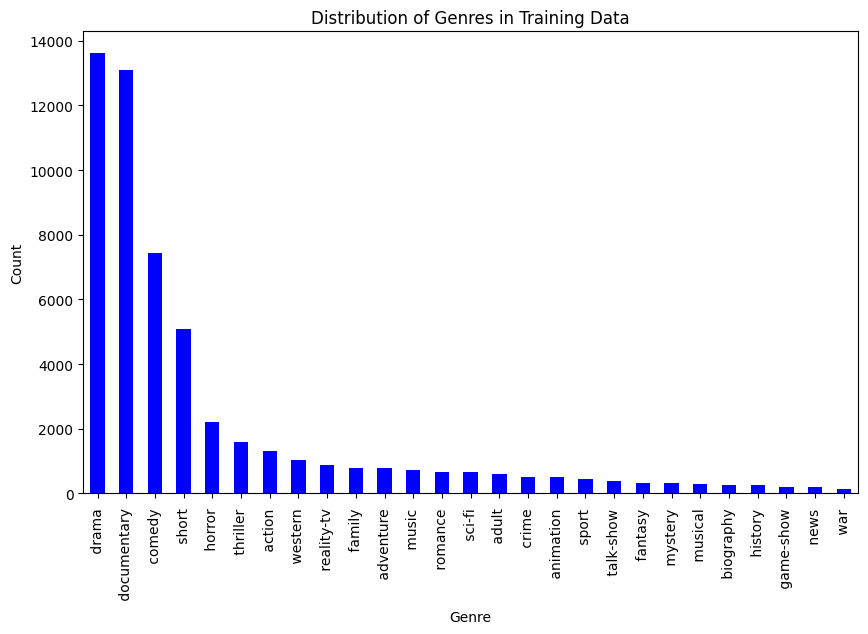

In [23]:
# Visualize Data - Distribution of Genres in Training Data
 
plt.figure(figsize=(10, 6))
train['GENRE'].value_counts().plot(kind='bar', color='blue')
plt.title('Distribution of Genres in Training Data')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

we have imbalanced distribution of genres in trainning data so we have to use oversampling to balance the trainning data


In [24]:
# Text Preprocessing for Train Data

train['TITLE'] = train['TITLE'].str.lower()
train['DESCRIPTION'] = train['DESCRIPTION'].str.lower()

# TF-IDF Vectorization for Train Data

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
x_train_tfidf = tfidf_vectorizer.fit_transform(train['TITLE'] + ' ' + train['DESCRIPTION'])
y_train = train['GENRE']


In [25]:
#Train data after preprocessing

print(x_train_tfidf)

  (0, 14896)	0.11283577194877155
  (0, 89840)	0.16187865500146134
  (0, 117021)	0.13065687474565513
  (0, 22155)	0.09686687017075676
  (0, 10234)	0.1691052787417561
  (0, 36636)	0.17601104209674864
  (0, 26456)	0.1691052787417561
  (0, 93080)	0.11325570805602589
  (0, 44678)	0.0700140601704976
  (0, 24784)	0.09209459720947055
  (0, 71014)	0.06004771792506328
  (0, 69621)	0.04764643865307356
  (0, 4844)	0.12133041585714252
  (0, 21501)	0.13540561067465945
  (0, 131761)	0.14186145868238542
  (0, 56582)	0.12158815413559067
  (0, 132359)	0.16089583711123426
  (0, 94811)	0.10390796881867558
  (0, 40077)	0.09986864588632188
  (0, 41013)	0.1640052967238848
  (0, 126261)	0.10622926772566876
  (0, 7130)	0.1292667415072799
  (0, 22643)	0.11484642190586192
  (0, 113760)	0.16042226571290513
  (0, 54833)	0.10343879439140122
  :	:
  (54213, 43249)	0.1678547300497393
  (54213, 128579)	0.14146130203766102
  (54213, 20837)	0.12372533321832176
  (54213, 12098)	0.1787708807243012
  (54213, 109121)	0.2005

In [26]:
# Text Preprocessing for Test Data

test['TITLE'] = test['TITLE'].str.lower()
test['DESCRIPTION'] = test['DESCRIPTION'].str.lower()

# TF-IDF Vectorization for Test Data

x_test_tfidf = tfidf_vectorizer.transform(test['TITLE'] + ' ' + test['DESCRIPTION'])


In [27]:
#Test data after preprocessing

print(x_test_tfidf)

  (0, 132178)	0.07723030965930751
  (0, 131692)	0.14276455403103375
  (0, 127937)	0.7244174398692158
  (0, 123002)	0.08633363464426817
  (0, 122108)	0.12296593552308774
  (0, 121803)	0.12216957138278162
  (0, 115011)	0.08714985478228343
  (0, 114902)	0.08772626621554351
  (0, 114768)	0.10351821863181784
  (0, 109217)	0.1759504656544637
  (0, 108120)	0.1759504656544637
  (0, 103110)	0.18085129255090931
  (0, 100618)	0.08235403854445922
  (0, 96648)	0.11379111874935145
  (0, 85292)	0.1280424420556733
  (0, 77924)	0.10618191428802373
  (0, 77717)	0.08710264726281644
  (0, 71462)	0.1318099354638689
  (0, 71058)	0.09304909639354327
  (0, 69621)	0.0868701564675276
  (0, 61221)	0.07522719107292432
  (0, 48413)	0.09769911376906405
  (0, 47620)	0.08396775259802947
  (0, 42518)	0.0926163400072346
  (0, 39974)	0.19422518401035885
  :	:
  (54199, 70258)	0.057432247345554396
  (54199, 69684)	0.08702404787472318
  (54199, 58382)	0.1412151675068971
  (54199, 57481)	0.14008917772316354
  (54199, 53889

In [28]:
# Create a StandardScaler object
scaler = StandardScaler(with_mean=False)

#features scaling
x_train_tfidf=scaler.fit_transform(x_train_tfidf)
x_test_tfidf=scaler.fit_transform(x_test_tfidf)

In [29]:
#train data after scaling
print(x_train_tfidf)

  (0, 14896)	8.195548054582995
  (0, 89840)	26.900959202807858
  (0, 117021)	18.366599169633123
  (0, 22155)	6.663570165630442
  (0, 10234)	47.37837795629087
  (0, 36636)	45.99048883459751
  (0, 26456)	39.52997146227357
  (0, 93080)	9.337174516834873
  (0, 44678)	2.9695879515060595
  (0, 24784)	5.344730430434673
  (0, 71014)	1.9948158923310104
  (0, 69621)	1.508027887924379
  (0, 4844)	14.615458301564178
  (0, 21501)	21.0052115025726
  (0, 131761)	25.62525231989601
  (0, 56582)	12.71179891407307
  (0, 132359)	34.815230742593144
  (0, 94811)	8.182248758308281
  (0, 40077)	7.26282771182726
  (0, 41013)	41.10901687974291
  (0, 126261)	9.784270859339228
  (0, 7130)	18.665567771236596
  (0, 22643)	5.31937272228233
  (0, 113760)	31.000396312415592
  (0, 54833)	6.567481058825407
  :	:
  (54213, 43249)	17.091157788372563
  (54213, 128579)	11.967944051498343
  (54213, 20837)	8.423738899218888
  (54213, 12098)	20.323352853858324
  (54213, 109121)	43.576986209334294
  (54213, 130554)	11.490703137

In [30]:
# Apply Oversampling to balance data

oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
x_train_resampled, y_train_resampled = oversampler.fit_resample(x_train_tfidf, y_train)


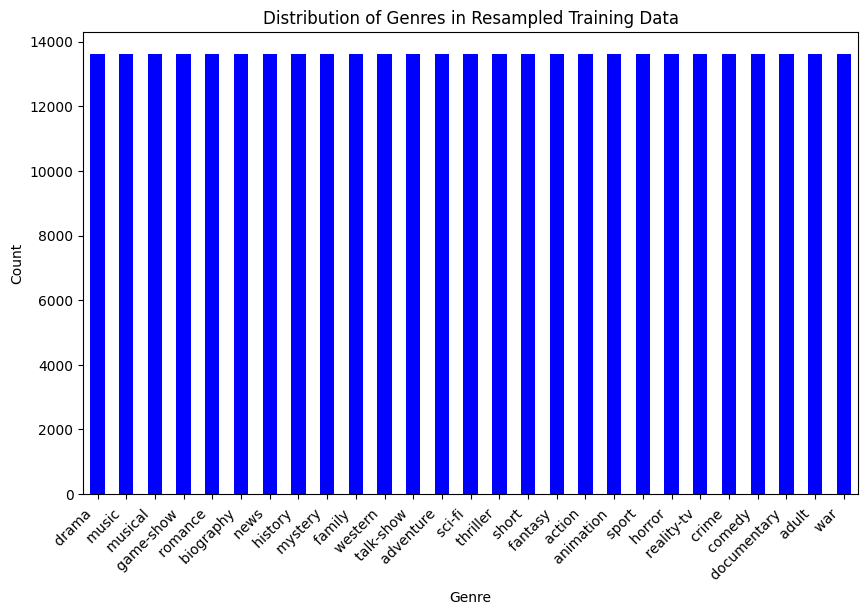

In [31]:
# Visualize the distribution of genres in the resampled training data

plt.figure(figsize=(10,6))
y_train_resampled.value_counts().plot(kind='bar', color='blue')
plt.title('Distribution of Genres in Resampled Training Data')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.show()



now we have balanced trainning dataset

In [32]:
# LinearRegression model
model=LogisticRegression(random_state=10,max_iter=1000)
model.fit(x_train_resampled,y_train_resampled)
     


LogisticRegression(max_iter=1000, random_state=10)

In [34]:
from sklearn.metrics import classification_report
# Make Predictions

predictions = model.predict(x_test_tfidf)

# Compare Predictions with True Labels
true_labels = test_solution['GENRE']

# Accuracy
accuracy = accuracy_score(true_labels,predictions)
print(f'Accuracy: {accuracy}')

# Precision
precision = precision_score(true_labels,predictions, average='weighted')  # Set average='weighted' for multiclass
print(f'Precision: {precision}')

# Recall
recall = recall_score(true_labels,predictions, average='weighted')  # Set average='weighted' for multiclass
print(f'Recall: {recall}')

# F1 Score
f1 = f1_score(true_labels, predictions, average='weighted')  # Set average='weighted' for multiclass
print(f'F1 Score: {f1}')

Accuracy: 0.5190774907749077
Precision: 0.4947354352940124
Recall: 0.5190774907749077
F1 Score: 0.49805069913926925
